# 7. Solutions To Ax=b

1. [Anatomy Of A Linear System](#1.-Anatomy-Of-A-Linear-System)
1. [Orthogonal Vectors & Spaces](#2.-Orthogonal-Vectors-&-Spaces)
1. [Fundamental Spaces](#3.-Fundamental-Spaces)
1. [Approximating A Solution](#4.-Approximating-A-Solution)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Anatomy Of A Linear System

> The matrix $A$ corresponds with some linear transformation, so solving $Ax = b$ means we're looking for a vector $x$ which, after applying the transformation, lands on $b$.
> -- <cite>[3Blue1Brown](https://youtu.be/uQhTuRlWMxw?t=163)</cite>

Take the linear system:

$
\begin{bmatrix}
1 & 3 & 1 & 2 \\
2 & 6 & 4 & 8 \\
0 & 0 & 2 & 4 \\
\end{bmatrix}
$
$
\begin{bmatrix}
\chi_0 \\
\chi_1 \\
\chi_2 \\
\chi_3 \\
\end{bmatrix}
$
$ =
\begin{bmatrix}
1 \\
3 \\
1 \\
\end{bmatrix}
$

### 1.1 Important Attributes

- Row echelon form:

$
\begin{bmatrix}
1 & 3 & 1 & 2 \\
0 & 0 & 2 & 4 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$
$
\begin{bmatrix}
\chi_0 \\
\chi_1 \\
\chi_2 \\
\chi_3 \\
\end{bmatrix}
$
$ =
\begin{bmatrix}
1 \\
1 \\
0 \\
\end{bmatrix}
$

- Reduced row echelon form:

$
\begin{bmatrix}
1 & 3 & 0 & 0 \\
0 & 0 & 1 & 2 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$
$
\begin{bmatrix}
\chi_0 \\
\chi_1 \\
\chi_2 \\
\chi_3 \\
\end{bmatrix}
$
$ =
\begin{bmatrix}
\frac{1}{2} \\
\frac{1}{2} \\
0 \\
\end{bmatrix}
$

- Pivots: $A_{0, 0}, A_{1, 2}$  
The columns with a leading 1 in reduced row echelon form
- The free variables: $\chi_1, \chi_3$  
The variables that scale non pivot columns
- The dependent variables: $\chi_0, \chi_2$  
The variables that scale pivot columns


- Column space $\mathcal{C}(A) \in \mathbb{R}^m$  
The space created by all possible linear combinations of the columns of the matrix
- Null space $\mathcal{N}(A) \in \mathbb{R}^n$  
All possible $x$ solutions for $Ax=0$


- Row space $\mathcal{R}(A) \in \mathbb{R}^n$ or $\mathcal{C}(A^T) \in \mathbb{R}^n$  
The space created by all possible linear combinations of the rows of the matrix
- Left null space $\mathcal{N}(A^T) \in \mathbb{R}^m$  
All possible $x$ solutions for $x^TA = 0$


- Dimension of column space (rank): $2$ (number of pivot columns / linearly independent columns)
- Dimension of row space: $2$ (equals dimension of column space, or number of nonzero row vectors)
- Dimension of null space (nullity): $1$ ($dim(A) - rank(A)$)
- The basis for the column space: columns $A_0, A_2$  
Column vectors in the matrix that span the column space and that are linearly independent
- The basis for the row space: rows $A_0^T, A_1^T$  
Row vectors in the matrix that span the row space and that are linearly independent

So, is $b$ contained in $\mathcal{C}(A)$?

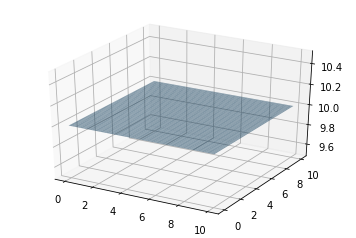

In [40]:
# @todo: Visualize column space and vector b inside of it
# do Ax = b, and visualize column space of A to show that it has a solution

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.linspace(0, 10, 100)
Y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(X, Y)
Z = np.linspace(10, 10, 100)
Z

ax.plot_surface(X, Y, np.array([Z]), alpha=.5)
plt.show()

- A specific solution ($x_s$):

$x_s=
\begin{pmatrix}
1/2 \\
0 \\
1/2 \\
0
\end{pmatrix}
$, as $
\begin{bmatrix}
1 & 3 & 0 & 0 \\
0 & 0 & 1 & 2 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$
$
\begin{bmatrix}
1/2 \\
0 \\
1/2 \\
0
\end{bmatrix}
$
$ =
\begin{bmatrix}
\frac{1}{2} \\
\frac{1}{2} \\
0 \\
\end{bmatrix}
$ and thus
$
\begin{bmatrix}
1 & 3 & 1 & 2 \\
2 & 6 & 4 & 8 \\
0 & 0 & 2 & 4 \\
\end{bmatrix}
$
$
\begin{bmatrix}
1/2 \\
0 \\
1/2 \\
0
\end{bmatrix}
$
$ =
\begin{bmatrix}
1 \\
3 \\
1 \\
\end{bmatrix}
$

- The general solution:

## 2. Orthogonal Vectors & Spaces

Orthogonal or perpendicular means, at an angle of $90^{\circ}$. 

### 2.1 Vectors

Two vectors are perpendicular if their dot product is equal to zero:

Dot product black: 0
Dot product red: 0
Dot product blue: 0.75


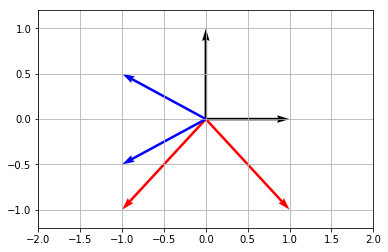

In [3]:
e_0, e_1 = np.array([1, 0]), np.array([0, 1])
x, y = np.array([1, -1]), np.array([-1, -1])
v, w = np.array([-1, -.5]), np.array([-1, .5]) 

plt.quiver([0], [0], *zip(*[e_0, e_1]), angles = 'xy', scale_units = 'xy', scale = 1)
plt.quiver([0], [0], *zip(*[x, y, v, w]), angles = 'xy', scale_units = 'xy', scale = 1, color=['r', 'r', 'b', 'b'])
plt.xlim(-2, 2)
plt.ylim(-1.2, 1.2)
plt.grid()

print("Dot product black:", e_0.dot(e_1))
print("Dot product red:", x.dot(y))
print("Dot product blue:", v.dot(w))

### 2.2 Spaces

Two subspaces are said to be orthogonal if all the dot products between vectors from the first and the second subspace are zero.

Let $V, W \in \mathbb{R}^n$ be subspaces. If $\{\forall v \in V, \forall w \in W \mid v \perp w\}$, then $V\perp W$.

Given a subspace $V \in \mathbb{R}^n$, the set of all vectors in $\mathbb{R}^n$ that are orthogonal to $V$ is denoted by $V^\perp$.

## 3. Fundamental Spaces

Let $A \in \mathbb{R}^{m\times n}$.

- Column space $\mathcal{C}(A) \in \mathbb{R}^m$
- Null space $\mathcal{N}(A) \in \mathbb{R}^n$
- Row space $\mathcal{R}(A) \in \mathbb{R}^n$ or $\mathcal{C}(A^T) \in \mathbb{R}^n$
- Left null space $\mathcal{N}(A^T) \in \mathbb{R}^m$

### 3.1 Theorem $\mathcal{R}(A) \perp \mathcal{N}(A)$

The row space and the null space of $A$ are orthogonal to eachother.

**Proof:** Let $y \in \mathcal{R}(A)$ and $z \in \mathcal{N}(A)$. Show that $y^Tz = 0$.

If $y \in \mathcal{R}(A) \rightarrow y \in A^Tx$ for some $x \in \mathbb{R}^m$: 
- $y^Tz = (A^Tx)^Tz$
- $= x^TAz$
- $= x^T0$
- $=0$

### 3.2 Theorem $x = x_r + x_n$

The solution $x$ can be written as a sum of a vector in the row space of $A$ and a vector in the null space of $A$.

Every $x \in \mathbb{R}^n$, where $x_r \in \mathcal{R}(A)$ and $x_n \in \mathcal{N}(A)$, can be written as:

$$x=x_r + x_n$$

- If $dim(\mathcal{R}(A)) = k$, then $dim(\mathcal{N}(A)) = n-k$
- $\{\upsilon_0, \ldots, \upsilon_{k-1}\}$ be a basis for $\mathcal{R}(A)$
- $\{\upsilon_k, \ldots, \upsilon_{n-1}\}$ be a basis for $\mathcal{N}(A)$
- Then $\{\upsilon_0, \ldots, \upsilon_{n-1}\}$ are linearly independent (and form a basis for $\mathbb{R}^n$)

![](https://notebooks.azure.com/menziess/libraries/Python-Linear-Algebra/raw/res%2FSpaces.png)

## 4. Approximating A Solution

- $Ax \approx b$  
The reason why we approximate a solution, is because $b$ is not in the column space of $A$.

![](https://notebooks.azure.com/menziess/libraries/Python-Linear-Algebra/raw/res%2FApproximate.png)

### 4.1 The Normal Equation $A^TA\hat{x} = A^Tb$

- Let $\hat{x}$ be best solution  
Meaning that the solution vector lies in the column space, and is closest to $b$ . Meaning that the solution vector, plus a perpendicular vector, result in vector $b$.
- $b = z + w$, where:
    - $z \in \mathcal{C}(A); and$
    - $w \in \mathcal{C}(A)^\perp$
- $w \in \mathcal{C}(A)^\perp\rightarrow$  
$w \in \mathcal{N}(A^T) \rightarrow$  
$A^Tw = 0$
- $0 = A^T(b-z)$
- $A^T(b - A\hat{x})$
- $A^TA\hat{x} = A^Tb$

### 4.2 Approximating  $Ax \approx b$:

Let $Ax =
\begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{pmatrix}
$
$
\begin{pmatrix}
\gamma_0 \\
\gamma_1
\end{pmatrix}
\approx$
$
\begin{pmatrix}
0.5 \\
2.25 \\
2
\end{pmatrix}
= b$

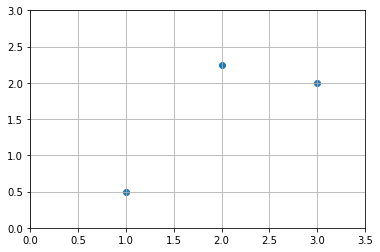

In [5]:
b = [0.5, 2.25, 2.]

plt.scatter([1, 2, 3], b)
plt.xlim(0, 3.5)
plt.ylim(0, 3)
plt.grid()

Solve $A^TAx = A^Tb$:

$A^Tb = 
\begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{pmatrix}^T
$
$
\begin{pmatrix}
0.5 \\
2.25 \\
2
\end{pmatrix}
=$
$
\begin{pmatrix}
4.75 \\
11 \\
\end{pmatrix}
$

$A^TA = 
\begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{pmatrix}^T
$
$
\begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{pmatrix}
=$
$
\begin{pmatrix}
3 & 6 \\
6 & 14 \\
\end{pmatrix}
$

We know that $x = A^{-1}b$, because it's a $2 \times 2$ matrix, we can solve it this way, instead of using elimination.

$(A^TA)^{-1} = 
\begin{pmatrix}
3 & 6 \\
6 & 14 \\
\end{pmatrix}^{-1}
=$
$ \frac{1}{6}
\begin{pmatrix}
14 & -6 \\
-6 & 3 \\
\end{pmatrix}
$

The best approximate solution is:

$\hat{x} = (A^TA)^{-1}A^Tb = \frac{1}{6}
\begin{pmatrix}
14 & -6 \\
-6 & 3 \\
\end{pmatrix}
$
$
\begin{pmatrix}
4.75 \\
11 \\
\end{pmatrix}
=$
$
\begin{pmatrix}
\frac{1}{12} \\
\frac{3}{4} \\
\end{pmatrix}
$

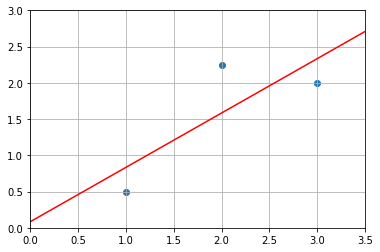

In [6]:
def solution(x):
    return 1/12 + 3/4 * x

b = [0.5, 2.25, 2.]
x = np.linspace(0, 3.5, 100)
y = list(map(solution, x))

plt.scatter([1, 2, 3], b)
plt.plot(x, y, color="red")
plt.xlim(0, 3.5)
plt.ylim(0, 3)
plt.grid()

### 4.3 The Projection

We can calculate the projection of $b$ onto the column space of $A$:

- Projection: $\hat{b} = A\hat{x} = 
\begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{pmatrix}
$
$
\begin{pmatrix}
\frac{1}{12} \\
\frac{3}{4} \\
\end{pmatrix}
=$
$
\begin{pmatrix}
1/12 + 3/4 \\
1/12 + 6/4 \\
1/12 + 9/4
\end{pmatrix}
=$
$
\begin{pmatrix}
\frac{5}{6} \\
1 \frac{7}{12} \\
2 \frac{1}{3}
\end{pmatrix}
$

### 4.4 Alternative Best Approximation

Finally we can find the pseudo inverse of $A$, which is a generalization of the matrix inverse when a matrix is not invertible. The pseudo inverse can also be used to find the approximate solution $\hat{x}$:

- Pseudo inverse: $A^\dagger = (A^TA)^{-1}A^T$
- Approximate solution: $x = A^\dagger b$

We calculated $(A^TA)^{-1} = 
\frac{1}{6}
\begin{pmatrix}
14 & -6 \\
-6 & 3 \\
\end{pmatrix}
$, 

so $A^\dagger = \frac{1}{6}
\begin{pmatrix}
14 & -6 \\
-6 & 3 \\
\end{pmatrix}
$
$
\begin{pmatrix}
1 & 1 & 1\\
1 & 2 & 3
\end{pmatrix}
=$
$ \frac{1}{6}
\begin{pmatrix}
8 & 2 & -4 \\
-3 & 0 & 3
\end{pmatrix}
$



$\hat{x} = \frac{1}{6}
\begin{pmatrix}
8 & 2 & -4 \\
-3 & 0 & 3
\end{pmatrix}
$
$
\begin{pmatrix}
0.5 \\
2.25 \\
2
\end{pmatrix}
=$
$ \frac{1}{6}
\begin{pmatrix}
0.5 \\
4.5
\end{pmatrix}
=$
$
\begin{pmatrix}
\frac{1}{12} \\
\frac{3}{4}
\end{pmatrix}
$